# Model Development untuk Project SafeFood

## 1. Pisahkan Dataset: Training dan Testing

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca dataset
data = pd.read_csv('../data/processed/data_donor_recipient_labeled.csv')

# Pilih fitur (X) dan target (y)
features = data.drop(columns=['matching_score', 'is_matching'])
target = data['matching_score']

# Pisahkan data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## 2. Preprocessing untuk Neural Network

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identifikasi kolom kategorikal dan numerikal
categorical_cols = ['makanan_disumbangkan', 'kondisi_makanan', 'makanan_dibutuhkan', 'kondisi_makanan_diterima', 'status_penerima']
numerical_cols = ['jumlah_disumbangkan', 'jumlah_dibutuhkan', 'lokasi_lat_penyumbang', 'lokasi_lon_penyumbang', 'lokasi_lat_penerima', 'lokasi_lon_penerima', 'frekuensi_menerima']

# Transformasi kolom
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


## 3. Bangun Model Neural Network dengan TensorFlow

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Inisialisasi model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output berupa skor kecocokan
])

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Pelatihan model
history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_test_processed, y_test))


Epoch 1/50


c:\Users\aryas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1009 - mae: 0.2337 - val_loss: 0.0141 - val_mae: 0.0965
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0222 - mae: 0.1183 - val_loss: 0.0108 - val_mae: 0.0842
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - mae: 0.1011 - val_loss: 0.0104 - val_mae: 0.0829
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134 - mae: 0.0928 - val_loss: 0.0076 - val_mae: 0.0699
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115 - mae: 0.0856 - val_loss: 0.0076 - val_mae: 0.0703
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 - mae: 0.0807 - val_loss: 0.0078 - val_mae: 0.0714
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0095 - mae: 0.0778 - val_loss: 0.0062 - val_mae: 0.0632
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0088 - mae: 0.0748 - val_loss: 0.0072 - val_mae: 0.0681
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 

## 4. Evaluasi Model

Mean Absolute Error on Test Set: 0.05


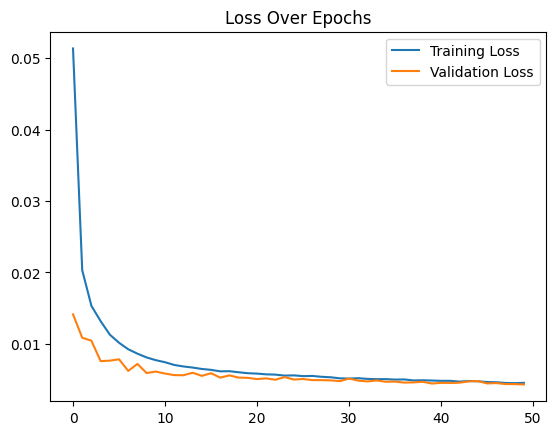

In [5]:
# Evaluasi pada data test
test_loss, test_mae = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Mean Absolute Error on Test Set: {test_mae:.2f}")

# Visualisasi hasil pelatihan
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

## 5. Simpan dan Integrasikan Model

In [6]:
model.save('../models/matching_model.h5')